In [2]:
# Bank Customers Churn

# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# create dummy data and classifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# key metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# roc and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# f score 
from sklearn.metrics import f1_score
import seaborn as sns

data = pd.read_csv('Churn_Modeling.csv') # load the data

data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#data exploration
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#check missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#There aren't missing values

In [5]:
#Check datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#find the correlation among the columns
data.corr(method = 'pearson')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


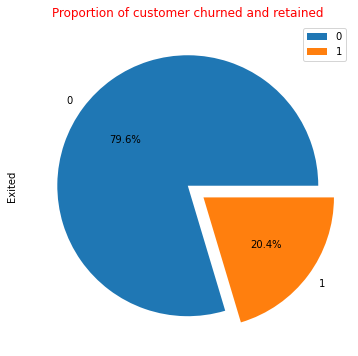

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
value_counts = pd.value_counts(data['Exited'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.15],autopct='%1.1f%%')
plt.title('Proportion of customer churned and retained', color="red")
plt.legend()
plt.show()
value_counts

#The output shows that 20% of the customers left the bank.

/home/crimarin007/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


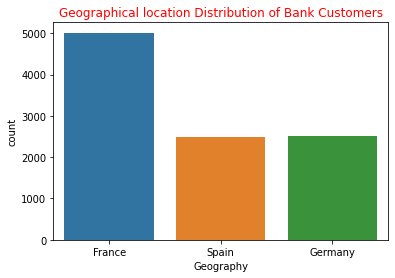

In [8]:
sns.countplot(data['Geography'])
plt.title('Geographical location Distribution of Bank Customers', color = "red")
plt.show()

#The output shows that almost half of the customers are from France, compared with 25% in Spain and 25% in Germany.

/home/crimarin007/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


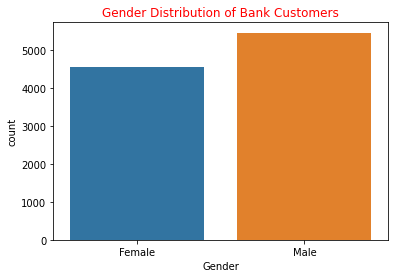

In [9]:
sns.countplot(data['Gender'])
plt.title('Gender Distribution of Bank Customers', color="red")
plt.show()

#There are more male customers.

<AxesSubplot:xlabel='Age', ylabel='count'>

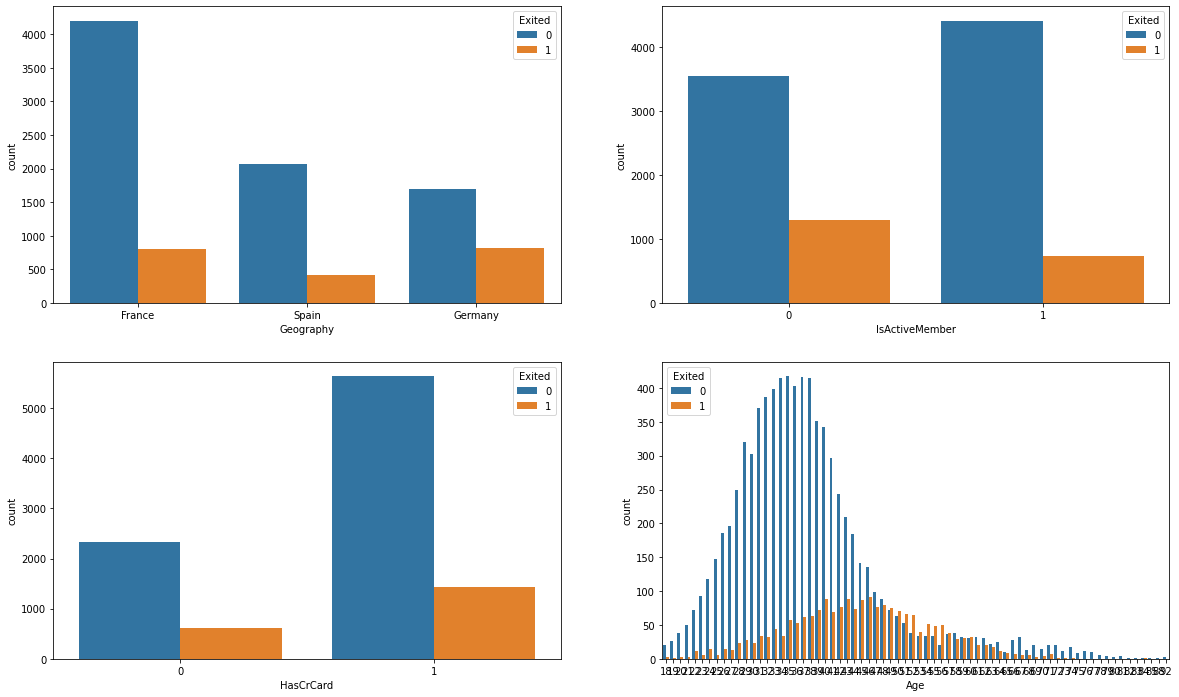

In [10]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='Age', hue = 'Exited',data = data, ax=axarr[1][1])

In [11]:
#The output shows that although the total number of French customers is twice that of Spanish and German customers, 
       #the proportion of French and German customers leaving the bank is the same.
#Inactive members have a smaller churn compare to others.
#Interestingly, majority of the customers that churned are those with credit cards. 
#Customers's age that churned are between 35-55.

<AxesSubplot:>

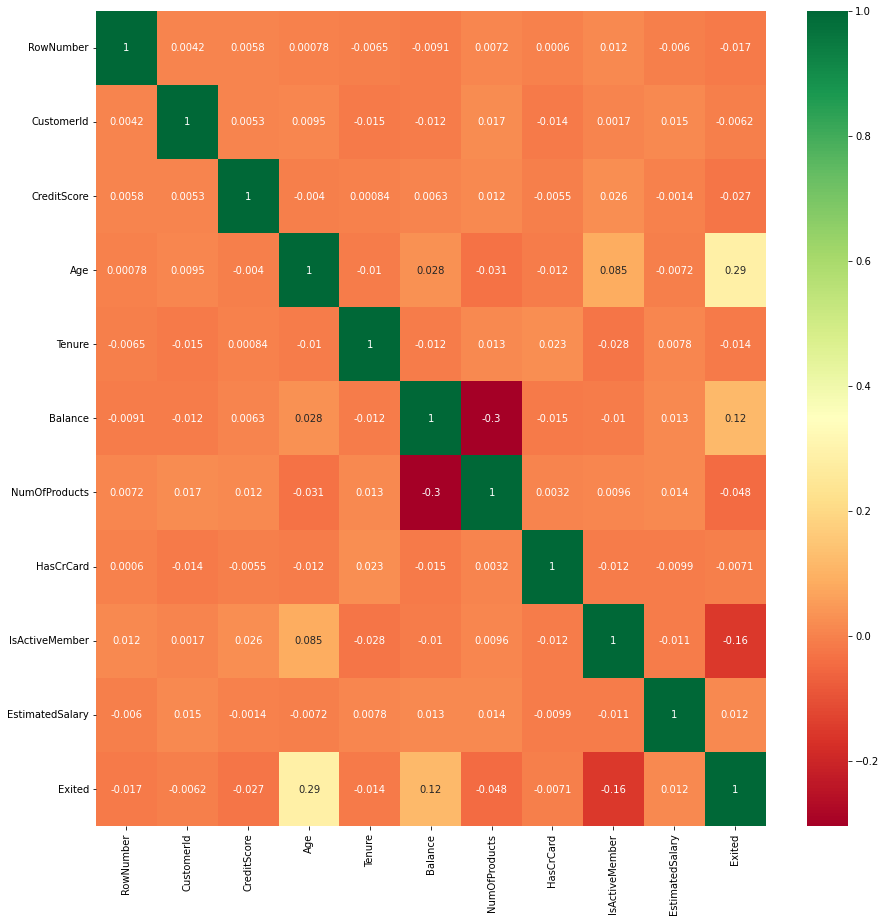

In [12]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn')

In [13]:
#convert 'Gender' column to numerical values
df=pd.get_dummies(data['Gender'])
df.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [14]:
#concatenate the dataframes
data = pd.concat([data, df], axis=1).reindex(data.index)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [15]:
#remove the column 'Gender' from dataframe
data.drop("Gender", axis=1, inplace=True)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
#convert 'Geography' column to numerical values
df1=pd.get_dummies(data['Geography'])
df1.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [17]:
#concatenate the dataframes
data = pd.concat([data, df1], axis=1).reindex(data.index)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [18]:
#remove the column 'Geography' from dataframe
data.drop("Geography", axis=1, inplace=True)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [19]:
#remove columns "RowNumber", "CustomerID" and "Surname", because they have no effect on customer leaving the bank.
data.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


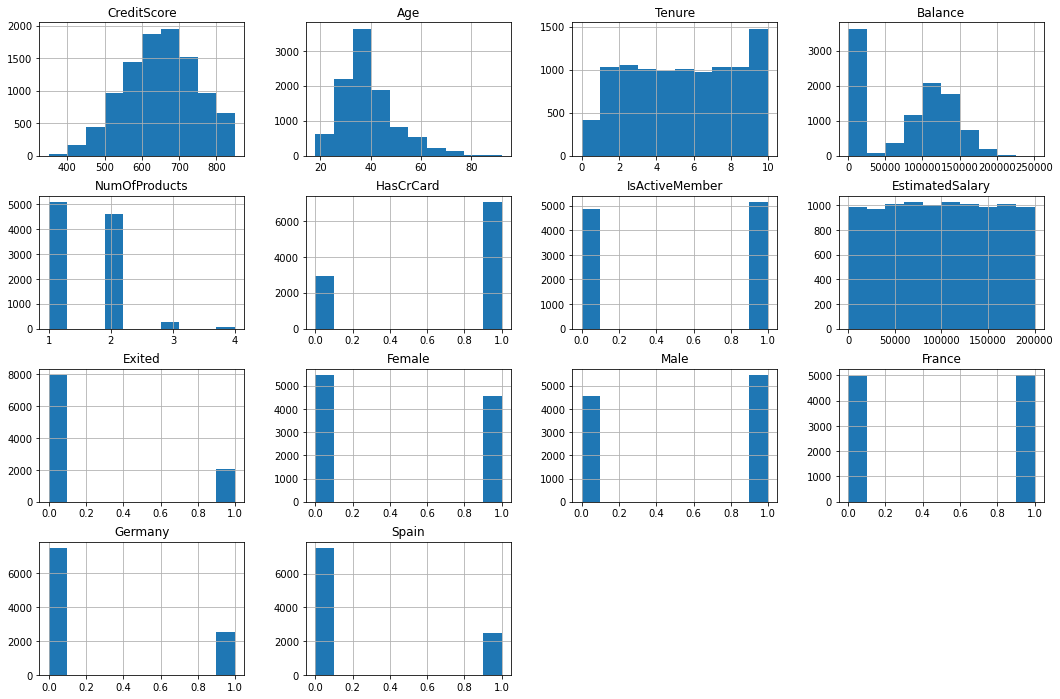

In [20]:
data.hist(figsize=(18,12))
plt.show()

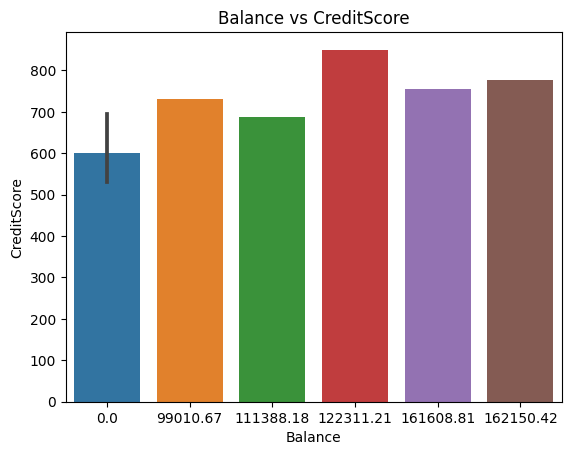

In [21]:
plt.style.use("default")
sns.barplot(x="Balance", y="CreditScore",data=data[179:190])
plt.title("Balance vs CreditScore",fontsize=12)
plt.xlabel("Balance")
plt.ylabel("CreditScore")
plt.show()

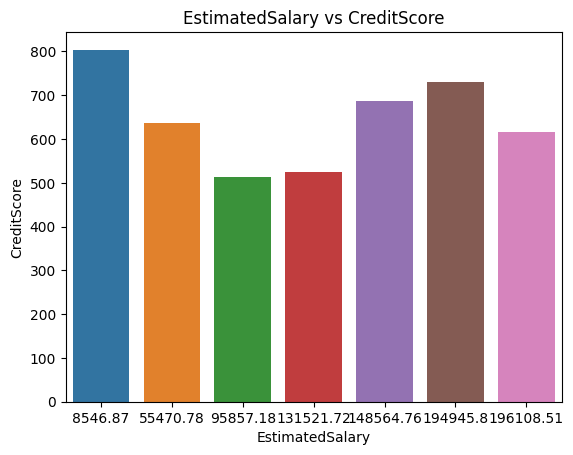

In [22]:
plt.style.use("default")
sns.barplot(x="EstimatedSalary", y="CreditScore",data=data[183:190])
plt.title("EstimatedSalary vs CreditScore",fontsize=12)
plt.xlabel("EstimatedSalary")
plt.ylabel("CreditScore")
plt.show()

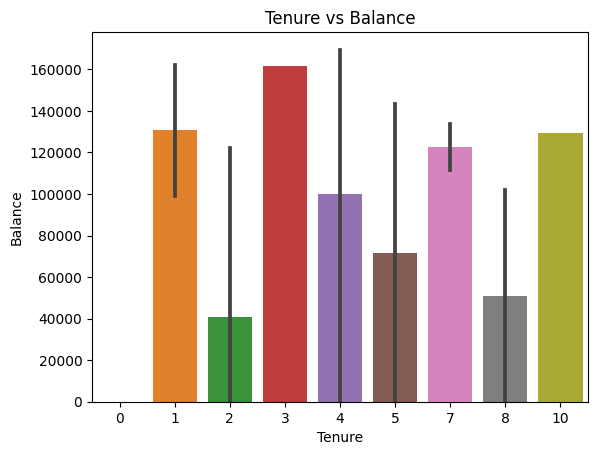

In [23]:
plt.style.use("default")
sns.barplot(x="Tenure", y="Balance",data=data[170:190])
plt.title("Tenure vs Balance",fontsize=12)
plt.xlabel("Tenure")
plt.ylabel("Balance")
plt.show()

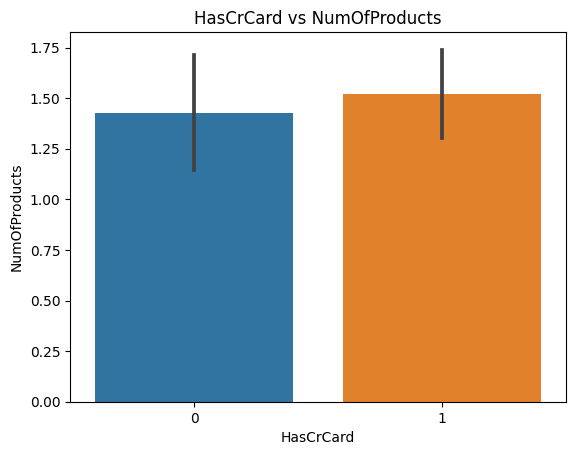

In [24]:
plt.style.use("default")
sns.barplot(x="HasCrCard", y="NumOfProducts",data=data[160:190])
plt.title("HasCrCard vs NumOfProducts",fontsize=12)
plt.xlabel("HasCrCard")
plt.ylabel("NumOfProducts")
plt.show()

In [25]:
#Split the data into train and test set

X = data.drop('Exited', axis='columns')
y = data['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

In [26]:
print(X_train)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7751          750   39       6       0.00              2          0   
4154          726   34       3       0.00              2          1   
3881          588   64       3       0.00              1          1   
9238          773   50       4       0.00              2          1   
5210          551   35       7  129717.30              2          0   
...           ...  ...     ...        ...            ...        ...   
3046          658   31       3  133003.03              1          0   
9917          635   53       8  117005.55              1          0   
4079          583   31       4  158978.79              1          1   
2254          679   36       6  147733.64              1          0   
2915          489   52       1  131441.51              1          1   

      IsActiveMember  EstimatedSalary  Female  Male  France  Germany  Spain  
7751               0         19264.33       1     0       0        0 

In [27]:
print(X_test)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7054          769   38       6       0.00              2          0   
442           534   34       7  121551.58              2          1   
3954          729   34       9  132121.71              1          0   
2288          619   30       7   70729.17              1          1   
3196          610   36       4  129440.30              2          1   
...           ...  ...     ...        ...            ...        ...   
6133          667   33       4  127076.68              2          1   
532           729   32       6   93694.42              1          1   
1370          769   26       7       0.00              2          1   
6514          563   26       7       0.00              2          0   
3081          693   29       2  151352.74              1          0   

      IsActiveMember  EstimatedSalary  Female  Male  France  Germany  Spain  
7054               0        104393.78       0     1       0        0 

In [28]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [29]:
# We perform training on the Random Forest model and generate the importance of the features

features_label = X_train.columns
forest = RandomForestClassifier (n_estimators = 1000, random_state = 0, n_jobs = -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.239284
 2) Age                            0.144461
 3) Tenure                         0.142315
 4) Balance                        0.141314
 5) NumOfProducts                  0.131717
 6) HasCrCard                      0.083926
 7) IsActiveMember                 0.039333
 8) EstimatedSalary                0.020985
 9) Female                         0.018449
10) Male                           0.010653
11) France                         0.009332
12) Germany                        0.009168
13) Spain                          0.009064


In [30]:
#Create Decision Tree

from sklearn import tree

model = tree.DecisionTreeClassifier() 
model.fit(X_train, y_train)


# ## Create new predictions

predictions = model.predict_proba(X_test)[:10, 1] 
predictions

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1.])

In [31]:
len(predictions)

10

In [32]:
model.score(X_train, y_train)

1.0

In [33]:
# #Create 3 different classifier objects
decissionTree_model_gini = DecisionTreeClassifier()
decissionTree_model_entropy = DecisionTreeClassifier(criterion="entropy")
decissionTree_model_depth3 = DecisionTreeClassifier(max_depth=3)

# #Fit the models
decissionTree_model_gini.fit(X_train, y_train)
decissionTree_model_entropy.fit(X_train, y_train)
decissionTree_model_depth3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
#Make prediction

from sklearn import metrics

y_pred_gini = decissionTree_model_gini.predict(X_test)
y_pred_entropy = decissionTree_model_entropy.predict(X_test)
y_pred_depth3 = decissionTree_model_depth3.predict(X_test)

print("Accuracy (gini): ", metrics.accuracy_score(y_test,y_pred_gini))
print("Accuracy (entropy): ", metrics.accuracy_score(y_test,y_pred_entropy))
print("Accuracy (depth3): ", metrics.accuracy_score(y_test,y_pred_depth3))

Accuracy (gini):  0.7865
Accuracy (entropy):  0.794
Accuracy (depth3):  0.838


In [35]:
from sklearn.svm import SVC
model = SVC()

In [36]:
model.fit(X_train, y_train)

SVC()

In [51]:
model.score(X_test, y_test)

0.7975

In [38]:
# from sklearn import metrics, svm

# #Creat 3 SVM Classifiers
# linear_SVM = svm.SVC(kernel="linear")
# sigmoid_SMV = svm.SVC(kernel="sigmoid")
# rbf_SVM = svm.SVC(kernel="rbf")

In [39]:
# #Train the model using the training set
# linear_SVM.fit(X_train, y_train)

# #Predict the response for test dataset
# y_pred_linear = linear_SVM.predict(X_test)

# #Calculate the accuracy of the model
# print("Accuracy (linear):", metrics.accuracy_score(y_test, y_pred_linear))


In [50]:
# #Train the model using the training set
# linear_SVM.fit(X_train, y_train)
# sigmoid_SVM.fit(X_train, y_train)
# rbf_SVM.fit(X_train, y_train)

# #Predict the response for test dataset
# y_pred_linear = linear_SVM.predict(X_test)
# y_pred_sigmoid = sigmoid_SVM.predict(X_test)
# y_pred_rbf = rbf_SVM.predict(X_test)

# #Calculate the accuracy of the model
# print("Accuracy (linear):", metrics.accuracy_score(y_test, y_pred_linear))
# print("Accuracy (sigmoid):", metrics.accuracy_score(y_test, y_pred_sigmoid))
# print("Accuracy (rbf):", metrics.accuracy_score(y_test, y_pred_rbf))

In [49]:
# #Calculate accuracy
# accuracy = accuracy_score(y_test, predictions)

# #Create Confusion Matrix
# CM = confusion_matrix(y_test , predictions)
# sns.heatmap(pd.DataFrame(CM), annot=True)

# TN, FP, FN, TP = CM.ravel()

In [52]:
# # Calculate Precision, Recall and Specificity
# precision = TP/(TP+FP)
# recall = TP/(TP+FN) 
# specificity = TN/(TN+FP)
# print(precision)
# print(recall)
# print(specificity)

In [53]:
# #Calculate AUC

# auc = roc_auc_score(y_test, predictions)
# print('AUC: %f' %auc)

# #Plot ROC curve

# fpr, tpr = roc_curve(y_test, predictions)[0:2]

# plt.plot(fpr, tpr, color='orange', label='ROC')
# plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

In [ ]:
#Calculate F Score 

# fscore = f1_score(y_test, predictions)
# print('F Score: %f' %fscore)

In [ ]:
# import torch
# import torch.utils.data
# import torch.nn as nn
# import torch.nn.functional as F

In [ ]:
# class ANN(nn.Module):
#     def __init__(self, input_dim = 11, output_dim = 1):
#         super(ANN, self).__init__()
    
#         # Input Layer (784) -> 784
#         self.fc1 = nn.Linear(input_dim, 64)
#         # 64 -> 64
#         self.fc2 = nn.Linear(64, 64)
#         # 64 -> 32
#         self.fc3 = nn.Linear(64, 32)
#         # 32 -> 32
#         self.fc4 = nn.Linear(32, 32)
#         # 32 -> output layer(10)
#         self.output_layer = nn.Linear(32,1)
#         # Dropout Layer (20%) to reduce overfitting
#         self.dropout = nn.Dropout(0.2)
    
#     # Feed Forward Function
#     def forward(self, x):
        
#         # Add ReLU activation function to each layer
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         # Add dropout layer
#         x = self.dropout(x)
#         x = F.relu(self.fc3(x))
#         x = F.relu(self.fc4(x))
#         # Don't add any ReLU activation function to Last Output Layer
#         x = self.output_layer(x)
        
#         # Return the created model
# #         return F.softmax(x,dim=1)
#         return nn.Sigmoid()(x)

In [ ]:
# # Create the Neural Network Model
# model = ANN(input_dim = 11, output_dim = 1)
# # Print its architecture
# print(model)

In [ ]:
# import torch
# import torch.utils.data
# from torch.autograd import Variable

In [ ]:

# # Numpy to Tensor Conversion (Train Set)
# X_train = torch.from_numpy(X_train)
# y_train = torch.from_numpy(y_train).view(-1,1)

# # Numpy to Tensor Conversion (Train Set)
# X_test = torch.from_numpy(X_test)
# y_test = torch.from_numpy(y_test).view(-1,1)

# kaggle_test_set = torch.from_numpy(kaggle_test_set)